# Net-flex by 헤이스팅스

## 컨텐츠 추천

넷플릭스에서 제공하는 영화와 TV Show 프로그램에 대한 정보가 담겨 있는 데이터셋을 활용하여 사용자가 이미 시청한 컨텐츠와 비슷한 컨텐츠를 추천하려 합니다.

## 데이터 준비

데이터의 구성을 확인합니다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("netflix_titles.csv")
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

  * 데이터는 `show_id`, `type`, `title`, `director`, `cast`, `country`, `date_added`, `release_year`, `rating`, `duration`, `listed_in`, `description`, 총 12개의 항목으로 구성되어 있습니다.

## 데이터 확인

전처리가 필요한 항목들을 확인하기 위해 각 속성들의 고유한 값을 확인합니다.

In [ ]:
def find_uniq(data):
    data_uniq = data.unique()
    uniq = []
    for d in data_uniq:
        if isinstance(d, float):
            continue
        uniq.extend([x.strip() for x in d.split(",") if x])
    return list(set(uniq))

In [ ]:
uniq_type = find_uniq(df["type"])
print(len(uniq_type))
uniq_type

2


['TV Show', 'Movie']

`type`에는 두 가지의 값이 존재합니다. `nan`는 존재하지 않습니다. 모든 항목에 대해 `type` 데이터가 존재함을 확인하였습니다.

In [ ]:
uniq_director = find_uniq(df["director"])
print(len(uniq_director))
uniq_director[:10]

4993


['Mike Binder',
 'Andreas Pichler',
 'Rajeev Chaudhari',
 'Jelle de Jonge',
 'Jim Monaco',
 'Spike Lee',
 'Midhun Manuel Thomas',
 'Jennifer Baichwal',
 'Scot Armstrong',
 'Tope Oshin']

`director`에는 4493개의 값이 존재합니다. 값의 개수를 세는 과정에서는 쉼표로 구분되어 있는 데이터를 구분하였습니다. 여러 명의 감독이 하나의 데이터가 포함되어 있는 경우가 존재합니다.

In [ ]:
uniq_cast = find_uniq(df["cast"])
print(len(uniq_cast))
uniq_cast[:10]

36439


['Jonathan Avildsen',
 'Omar Fierro',
 'Lorenzo Curcio',
 'Yash Shashank Dholye',
 'Nina Hoss',
 'Yuji Kondo',
 'Adèle Haenel',
 'Brenton Thwaites',
 'Tareq Abdalla',
 'Chelo Falcón']

`cast`에는 36439개의 값이 존재합니다. 값의 개수를 세는 과정에서는 쉼표로 구분되어 있는 데이터를 구분하였습니다. 여러 명의 배우가 하나의 데이터가 포함되어 있는 경우가 존재합니다.

In [ ]:
uniq_country = find_uniq(df["country"])
print(len(uniq_country))
uniq_country[:10]

122


['Malta',
 'Morocco',
 'Portugal',
 'Mexico',
 'Cameroon',
 'Austria',
 'Montenegro',
 'Ireland',
 'Jordan',
 'Kazakhstan']

`country`에는 122개의 값이 존재합니다. 값의 개수를 세는 과정에서는 쉼표로 구분되어 있는 데이터를 구분하였습니다. 여러 국가가 하나의 데이터가 포함되어 있는 경우가 존재합니다.

In [ ]:
uniq_rating = find_uniq(df["rating"])
print(len(uniq_rating))
uniq_rating

17


['TV-14',
 'PG',
 'NC-17',
 'TV-Y7-FV',
 'TV-Y7',
 'TV-G',
 '74 min',
 'PG-13',
 'NR',
 'TV-Y',
 '84 min',
 'R',
 'G',
 'UR',
 'TV-PG',
 '66 min',
 'TV-MA']

`rating`에는 14개의 값이 존재합니다(유효하지 않은 데이터 제외). 관람등급으로 유효하지 않은 값이 확인됩니다.

In [ ]:
uniq_genre = find_uniq(df["listed_in"])
print(len(uniq_genre))
uniq_genre[:10]

42


['Independent Movies',
 'TV Comedies',
 'Anime Series',
 'TV Thrillers',
 'Documentaries',
 'TV Dramas',
 'Classic Movies',
 'Docuseries',
 'Anime Features',
 'Romantic Movies']

`listed_in`에는 42개의 값이 존재합니다. 값의 개수를 세는 과정에서는 쉼표로 구분되어 있는 데이터를 구분하였습니다. 여러 장르가 하나의 데이터가 포함되어 있는 경우가 존재합니다.

`rating` 속성에 유효하지 않은 데이터가 확인됩니다.

In [ ]:
df[(df["rating"] == "74 min") | (df["rating"] == "84 min") | (df["rating"] == "66 min")]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in                                        description  
5541      NaN    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794      NaN    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813      NaN    Movies  The comic puts his trademark hilarious/thought...

확인 결과, 해당 데이터들은 데이터셋에 존재하는 속성들이 제대로 표현되어 있지 않습니다. 따라서 데이터셋에서 제외합니다.

In [ ]:
df = df.drop(
    df[
        (df["rating"] == "74 min")
        | (df["rating"] == "84 min")
        | (df["rating"] == "66 min")
    ].index
)
df = df.reset_index()
df.head()

index show_id     type                  title         director  \
0      0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      1      s2  TV Show          Blood & Water              NaN   
2      2      s3  TV Show              Ganglands  Julien Leclercq   
3      3      s4  TV Show  Jailbirds New Orleans              NaN   
4      4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

## 데이터 탐색
* 각각의 속성이 유사 컨텐츠 추천에 도움이 되는지 판단하기 이전에, 유용한 정보를 **예측**합니다.
    1. `show_id` 는 단순히 데이터의 인덱스를 나타내는 데이터로 컨텐츠 추천에 도움이 되지 않는 정보입니다.
    2. `type` 은 영화인지 tv프로그램인지를 나타내는 속성으로 도움이 되는 정보입니다.
    3. `title` 은 컨텐츠의 제목을 표현하지만, 제목은 비유나 상징이 포함되어 있어 컨텐츠의 속성을 제대로 표현할 수 없는 경우가 많아 도움이 되지 않는 정보입니다.
    4. `director` 는 감독 정보로, 도움이 되는 정보입니다.
    5. `cast` 는 출연진 정보로, 도움이 되는 정보입니다.
    6. `country` 는 국가 정보로, 도움이 되는 정보입니다.
    7. `date_added` 는 넷플릭스에 컨텐츠가 추가된 날짜로 중요하지 않은 정보입니다.
    8. `year` 는 콘텐츠가 공개된 날짜로, 도움이 되지 않는 정보입니다.
    9. `rating` 은 관람연령에 관련 정보로, 도움이 되는 정보입니다.
    10. `duration` 은 영상 길이에 대한 정보로, 도움이 되지 않는 정보입니다.
    11. `listed_in` 은 장르와 같은 정보로, 도움이 되는 정보입니다.
    12. `description` 은 컨텐츠 줄거리에 대한 정보로, 도움이 되는 정보입니다.
* 여러 속성들에 대한 통계를 확인함으로써 예측한 결과와 일치 여부를 확인합니다.

### 국가별 컨텐츠 수

모든 국가의 컨텐츠 통계를 확인할 수 없기 때문에, 각 국가별로 제작된 컨텐츠의 수를 파악하여 가장 많은 컨텐츠가 제작된 나라의 통계를 확인합니다.

In [ ]:
def count_contents(category="Movie", country="india"):
    df_subset = df[df["type"] == category]
    df_subset = df_subset.dropna(subset=["country"])
    df_subset = df_subset[
        df_subset["country"].str.lower().str.contains(country.lower())
    ]
    return len(df_subset)

In [ ]:
stats = {}

for con in uniq_country:
    count = count_contents(country=con)
    stats[con] = count
stats_top = sorted(stats.items(), key=lambda x: x[1], reverse=True)[:40]
stats_top = {k: [v] for k, v in stats_top}
print(stats_top)

{'United States': [2749], 'India': [962], 'United Kingdom': [534], 'Canada': [319], 'France': [303], 'Germany': [185], 'Spain': [171], 'Japan': [119], 'China': [114], 'Mexico': [111], 'Egypt': [102], 'Hong Kong': [100], 'Australia': [94], 'Nigeria': [94], 'Indonesia': [86], 'Turkey': [83], 'Philippines': [80], 'Belgium': [78], 'Italy': [75], 'Argentina': [71], 'Brazil': [66], 'South Korea': [61], 'South Africa': [51], 'Thailand': [46], 'Netherlands': [42], 'United Arab Emirates': [36], 'Denmark': [34], 'Ireland': [32], 'Poland': [32], 'Sweden': [31], 'New Zealand': [25], 'Chile': [24], 'Lebanon': [24], 'Norway': [21], 'Colombia': [20], 'Pakistan': [20], 'Israel': [19], 'Taiwan': [19], 'Switzerland': [18], 'Singapore': [18]}


컨텐츠 숫자를 국가별로 지도상에 표시하기 위하여 국가별 좌표 정보를 담고 있는 데이터를 준비합니다.

In [ ]:
df_coords = pd.read_csv("coords.csv")
df_coords.head()

country   latitude  longitude                  name
0      AD  42.546245   1.601554               Andorra
1      AE  23.424076  53.847818  United Arab Emirates
2      AF  33.939110  67.709953           Afghanistan
3      AG  17.060816 -61.796428   Antigua and Barbuda
4      AI  18.220554 -63.068615              Anguilla

In [ ]:
coords = {}
for each in stats_top:
    find = df_coords[df_coords["name"].str.lower() == each.lower()]
    coords[each] = [find.latitude.item(), find.longitude.item()]
print(coords)

{'United States': [37.09024, -95.712891], 'India': [20.593684, 78.96288], 'United Kingdom': [55.378051, -3.435973], 'Canada': [56.130366, -106.346771], 'France': [46.227638, 2.213749], 'Germany': [51.165691, 10.451526], 'Spain': [40.463667, -3.74922], 'Japan': [36.204824, 138.252924], 'China': [35.86166, 104.195397], 'Mexico': [23.634501, -102.552784], 'Egypt': [26.820553, 30.802498], 'Hong Kong': [22.396428, 114.109497], 'Australia': [-25.274398, 133.775136], 'Nigeria': [9.081999, 8.675277], 'Indonesia': [-0.789275, 113.921327], 'Turkey': [38.963745, 35.243322], 'Philippines': [12.879721, 121.774017], 'Belgium': [50.503887, 4.469936], 'Italy': [41.87194, 12.56738], 'Argentina': [-38.416097, -63.616672], 'Brazil': [-14.235004, -51.92528], 'South Korea': [35.907757, 127.766922], 'South Africa': [-30.559482, 22.937506], 'Thailand': [15.870032, 100.992541], 'Netherlands': [52.132633, 5.291266], 'United Arab Emirates': [23.424076, 53.847818], 'Denmark': [56.26392, 9.501785], 'Ireland': [53

In [ ]:
df_geo = pd.DataFrame(coords, index=["lat", "long"]).T
df_geo.head()

lat        long
United States   37.090240  -95.712891
India           20.593684   78.962880
United Kingdom  55.378051   -3.435973
Canada          56.130366 -106.346771
France          46.227638    2.213749

In [ ]:
df_stats = pd.DataFrame(stats_top, index=["count"]).T
df_stats.head()

count
United States    2749
India             962
United Kingdom    534
Canada            319
France            303

In [ ]:
df_map = pd.merge(df_geo, df_stats, left_index=True, right_index=True)
df_map.head()

lat        long  count
United States   37.090240  -95.712891   2749
India           20.593684   78.962880    962
United Kingdom  55.378051   -3.435973    534
Canada          56.130366 -106.346771    319
France          46.227638    2.213749    303

컨텐츠가 많이 제작된 상위 40개 국가국가별 컨텐츠의 숫자를 지도상에서 표현합니다.

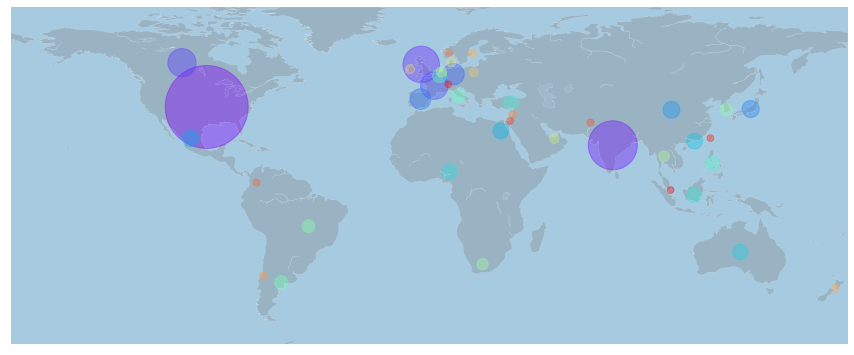

In [ ]:
import os

os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")

from matplotlib.pyplot import cm
from mpl_toolkits.basemap import Basemap

plt.rcParams["figure.figsize"] = 15, 10
rain_color = cm.rainbow(np.linspace(0, 1, 40))

m = Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color="#A6CAE0", linewidth=0)
m.fillcontinents(color="grey", alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
m.scatter(
    x=df_map["long"],  # longitude
    y=df_map["lat"],  # latitude
    s=df_map["count"] * 2.5,  # number of contents
    alpha=0.4,
    c=rain_color,
)

지도 상에서 북미 지역과 유럽, 인도 지역에서 많은 컨텐츠가 제작되었습니다. 이 중 미국과 인도, 그리고 대한민국의 컨텐츠 통계를 확인해보겠습니다.

### 국가와 장르 사이의 관계

특정 국가에서 어떤 장르의 컨텐츠가 많이 제작되는지 통계적으로 확인합니다. 만약 특정 국가에서 특정 장르가 많이 제작되고, 특정 장르가 특정 국가에서 많이 제작된다면 통계 확인 이전에 국가와 장르 정보가 컨텐츠 추천에 도움이 될 것이라는 예상이 적절함을 알 수 있습니다.  

#### 국가 - 장르
특정 국가에서 많이 제작되는 컨텐츠의 장르를 통계적으로 확인합니다.

In [ ]:
from collections import Counter


def count_genre(category="Movie", country="india", count=10):
    df_subset = df[df["type"] == category]
    df_subset = df_subset.dropna(subset=["country"])
    df_subset = df_subset[
        df_subset["country"].str.lower().str.contains(country.lower())
    ]
    genre = []
    for i in df_subset["listed_in"]:
        each = [x.strip() for x in i.split(",")]
        genre.extend(each)
    common = Counter(genre).most_common()
    summation = sum([x[1] for x in common])
    return [(x, f"{y / summation:.3f}") for (x, y) in common[:count]]

In [ ]:
def pichart(result, title="Attribute-Ratio"):
    index = []
    value = []
    for i in result:
        index.append(i[0])
        value.append(i[1])

    count_genre_series = pd.Series(value, index)
    colors = pd.Series(
        [
            "tab:blue",
            "tab:orange",
            "tab:green",
            "tab:red",
            "tab:purple",
            "tab:brown",
            "tab:pink",
            "tab:gray",
            "tab:olive",
            "tab:cyan",
        ],
        index=count_genre_series.index,
    )
    #     colors = pd.Series(['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'], index = count_genre_series.index)
    explode = pd.Series(
        [0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
        index=count_genre_series.index,
    )

    plt.figure(figsize=(8, 8))
    plt.pie(
        count_genre_series,
        labels=count_genre_series.index,
        autopct="%.1f%%",
        colors=colors,
        explode=explode,
        shadow=True,
    )
    plt.legend(loc=(1.1, 0.5))
    plt.title(title)
    plt.show()

미국에서 제작된 영화들의 장르 비율을 확인합니다.

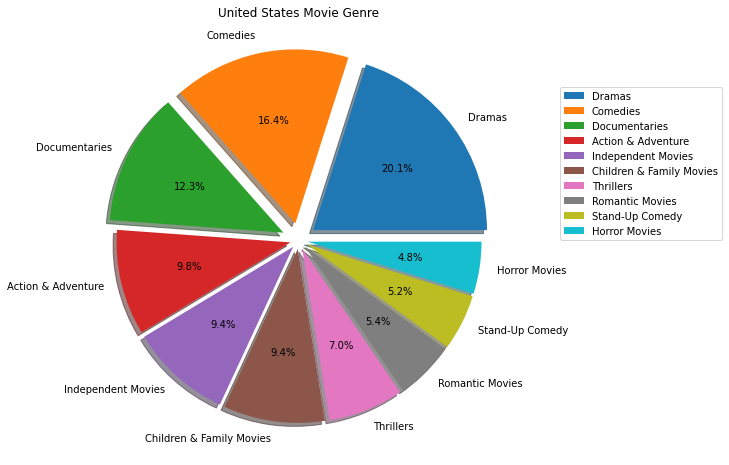

In [ ]:
result = count_genre(category="Movie", country="united states")

pichart(result, title="United States Movie Genre")

미국에서는 "Dramas", "Comedies", 그리고 "Documentaries" 영화를 많이 제작함을 확인할 수 있습니다.

미국에서 제작되는 TV Show들의 장르 비율을 확인합니다.

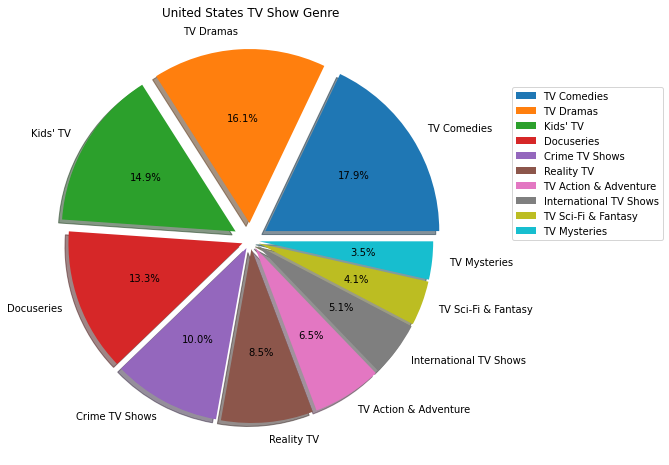

In [ ]:
result = count_genre(category="TV Show", country="united states")

pichart(result, title="United States TV Show Genre")

미국에서 제작되는 TV Show들은 "TV Comedies", "TV Dramas", 그리고 "Kids' TV"가 많습니다.

이번에는 인도에서 제작되는 영화와 TV Show의 장르들에 대해서 확인합니다.

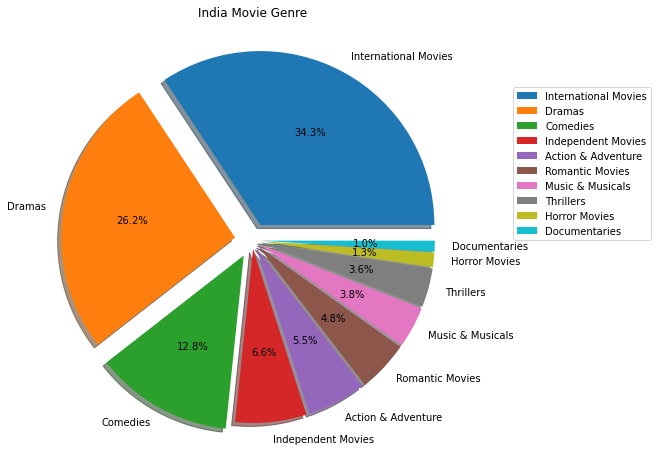

In [ ]:
result = count_genre(category="Movie", country="india")

pichart(result, title="India Movie Genre")

인도에서는 "International Movies"와 "Independent Movies"를 제외하면, "Dramas", "Comedies", 그리고 "Action & Adventure" 영화가 많이 제작됩니다.

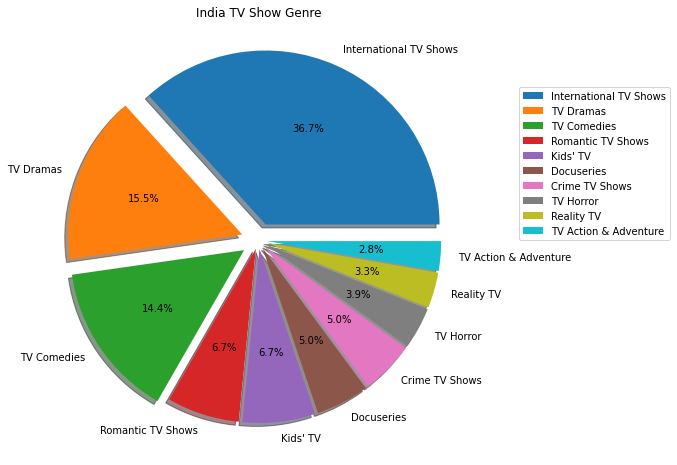

In [ ]:
result = count_genre(category="TV Show", country="india")

pichart(result, title="India TV Show Genre")

인도의 TV Show에는 "TV Dramas", "TV Comedies", 그리고 "Romantic TV Shows" 장르가 많이 제작됩니다.

이번에는 한국에서 제작되는 컨텐츠들의 장르를 확인합니다.

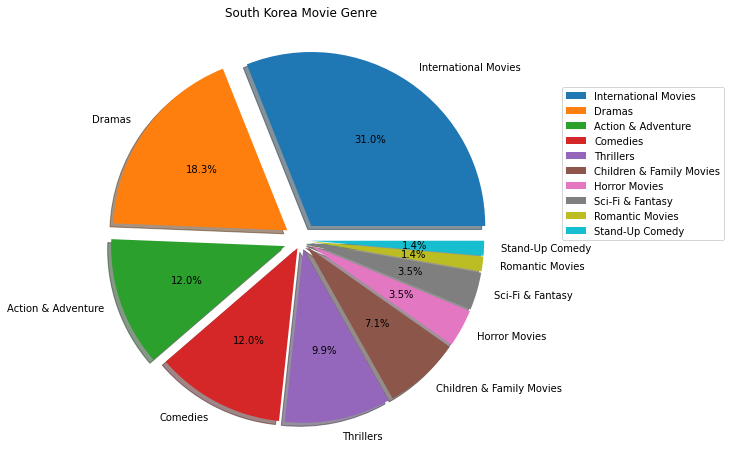

In [ ]:
result = count_genre(category="Movie", country="south korea")

pichart(result, title="South Korea Movie Genre")

한국에서는 "Dramas", "Action & Adventure", "Comedies" 장르의 영화가 많이 제작됩니다.

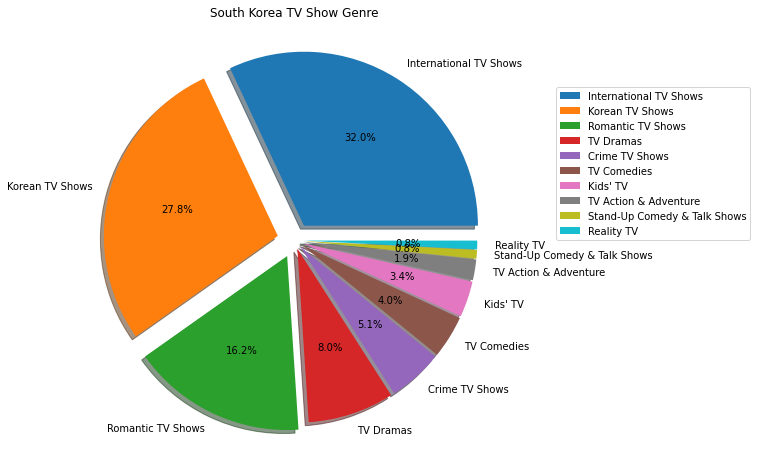

In [ ]:
result = count_genre(category="TV Show", country="south korea")

pichart(result, title="South Korea TV Show Genre")

한국의 TV Show의 통계에서는 미국, 인도와 비교하여 "Romantic TV Shows"의 비율이 높다는 점이 특징입니다.

#### 장르 - 국가

특정 장르가 어떤 국가에서 많이 제작되는지 확인합니다.

In [ ]:
def count_country(category="Movie", genre="action"):
    df_subset = df[df["type"] == category]
    df_subset = df_subset.dropna(subset=["country"])
    df_subset = df_subset.dropna(subset=["listed_in"])
    df_filtered = df_subset[
        df_subset["listed_in"].str.lower().str.contains(genre.lower())
    ]
    genre = []
    for i in df_filtered["country"]:
        each = [x.strip() for x in i.split(",")]
        genre.extend(each)
    common = Counter(genre).most_common()
    summation = sum([x[1] for x in common])
    return [(x, f"{y / summation:.3f}") for (x, y) in common[:10]]

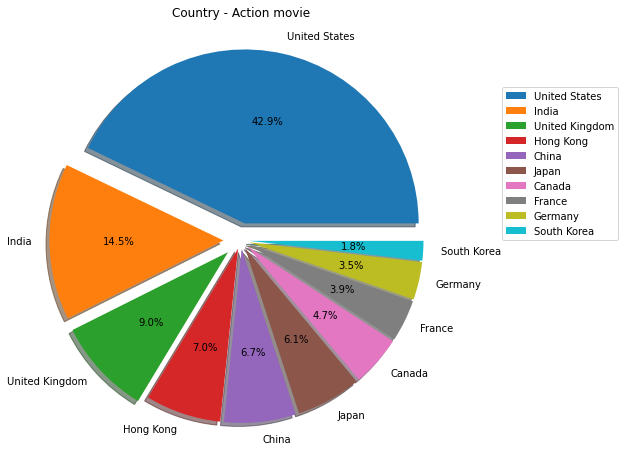

In [ ]:
result = count_country(category="Movie", genre="action")

pichart(result, title="Country - Action movie")

"Action & Adventure" 장르의 영화는 미국에서 가장 많이 제작됩니다. 제작되는 컨텐츠의 수가 많은 영향일 것이라 생각됩니다. 그 다음으로는 인도와 영국이 총 컨텐츠 수와 비례하지만, 홍콩에서 많은 "Action & Adventure" 장르의 영화가 제작된다는 점이 특징입니다.

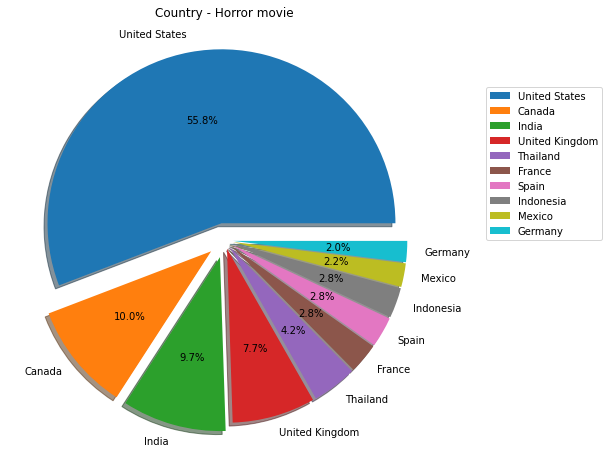

In [ ]:
result = count_country(category="Movie", genre="horror")

pichart(result, title="Country - Horror movie")

"Horror" 장르의 영화는 약 55.8%로 절반 이상이 미국에서 가장 많이 제작됩니다. 제작되는 컨텐츠의 수가 많은 영향일 것이라 생각됩니다. 제작되는 총 컨텐츠의 숫자를 생각하면 다음 순서로는 인도와 영국이 나와야 하지만, 캐나다가 다음에 등장합니다. 또한 태국이 5번째로 많이 제작한다는 점이 특징입니다.

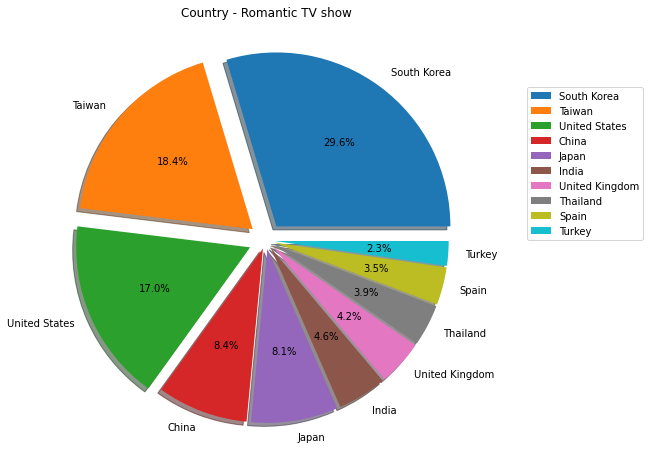

In [ ]:
result = count_country(category="TV Show", genre="romantic")

pichart(result, title="Country - Romantic TV show")

컨텐츠 수 자체는 적지만 한국이 "Romantic TV Show" 컨텐츠를 가장 많이 제작합니다. 그 다음으로는 대만이 많이 제작합니다.

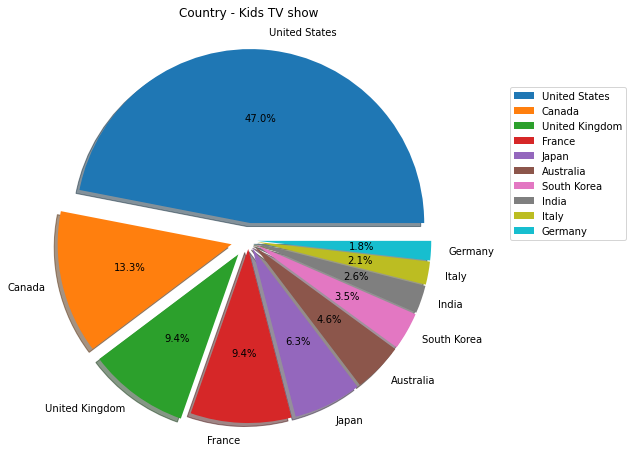

In [ ]:
result = count_country(category="TV Show", genre="kids")

pichart(result, title="Country - Kids TV show")

"Kids TV Show"는 미국이 절반에 가까운 비율로 컨텐츠를 제작하고, 그 다음으로는 캐나다, 영국이 많은 컨텐츠를 제작합니다.

### 특정 주제와 다른 속성과의 관계
이번에는 특정 주제의 컨텐츠와 다음 속성들 간의 연관성을 확인합니다.
* 어떤 주제를 다루는 영화인지는 제목(title)과 설명(description) 정보를 합친 이후, 특정 키워드를 포함하고 있는지 확인합니다.

#### 우주 테마

우주가 주제인 컨텐츠가 어떤 국가에서 많이 제작되는지, 어느 시기에 많이 개봉되었는지, 어느 감독이 많이 제작하였는지, 어떤 관람등급이 많은지를 확인합니다.  
컨텐츠가 우주 관련인지는 특정 키워드들(`space, galaxy, alien, planet`)을 포함하고 있는지, 특정 장르(`sci-fi`)포함 여부를 보고 확인합니다.

In [ ]:
import warnings

warnings.filterwarnings("ignore")

df_scifi = df[df["listed_in"].str.lower().str.contains("sci".lower())]
df_scifi["title_desc"] = df_scifi["title"] + " " + df_scifi["description"]
df_scifi = df_scifi[
    df_scifi["title_desc"].str.lower().str.contains("space|galaxy|alien|planet".lower())
]
df_scifi.head()

index show_id     type                                     title  \
28      28     s29    Movie                                Dark Skies   
102    102    s103  TV Show  Countdown: Inspiration4 Mission to Space   
161    161    s162    Movie                             Mars Attacks!   
347    347    s348    Movie                                 Planet 51   
350    350    s351    Movie                             Space Cowboys   

           director                                               cast  \
28    Scott Stewart  Keri Russell, Josh Hamilton, J.K. Simmons, Dak...   
102     Jason Hehir                                                NaN   
161      Tim Burton  Jack Nicholson, Glenn Close, Annette Bening, P...   
347    Jorge Blanco  Justin Long, Dwayne Johnson, Gary Oldman, Sean...   
350  Clint Eastwood  Clint Eastwood, Tommy Lee Jones, Donald Suther...   

                                  country          date_added  release_year  \
28                          United States  September 19, 2021          2013   
102                                   NaN   September 6, 2021          2021   
161                         United States   September 1, 2021          1996   
347  Spain, United Kingdom, United States      August 1, 2021          2009   
350                         United States      August 1, 2021          2000   

    rating  duration                                          listed_in  \
28   PG-13    97 min                    Horror Movies, Sci-Fi & Fantasy   
102  TV-14  1 Season                    Docuseries, Science & Nature TV   
161  PG-13   106 min            Comedies, Cult Movies, Sci-Fi & Fantasy   
347     PG    91 min  Children & Family Movies, Comedies, Sci-Fi & F...   
350  PG-13   130 min       Action & Adventure, Dramas, Sci-Fi & Fantasy   

                                           description  \
28   A family’s idyllic suburban life shatters when...   
102  From training to launch to landing, this all-a...   
161  As flying saucers head for Earth, the presiden...   
347  After landing on a planet reminiscent of 1950s...   
350  A retired engineer agrees to help NASA prevent...   

                                            title_desc  
28   Dark Skies A family’s idyllic suburban life sh...  
102  Countdown: Inspiration4 Mission to Space From ...  
161  Mars Attacks! As flying saucers head for Earth...  
347  Planet 51 After landing on a planet reminiscen...  
350  Space Cowboys A retired engineer agrees to hel...

In [ ]:
def get_total(df, category="country"):
    df_subset = df.dropna(subset=[category])
    cat = []
    for i in df_subset[category]:
        if isinstance(i, int):
            each = [i]
        else:
            each = [x.strip() for x in i.split(",")]
        cat.extend(each)
    return Counter(cat)


def count_category(df, df_subset, threshold=10, category="country"):
    cat_whole = get_total(df, category=category)
    cat_part = get_total(df_subset, category=category)
    result = []
    for k, v in cat_part.items():
        if k in cat_whole:
            if cat_whole[k] >= threshold:
                result.append([k, cat_part[k] / cat_whole[k], cat_whole[k]])
    result.sort(key=lambda x: x[1], reverse=True)
    return [x for x in result[:10]]

In [ ]:
def bar_graph(result, xlabel, ylabel="Ratio", title="Attribute-Ratio"):
    country = reversed([f"{x[0]} ({x[2]})" for x in result])
    values = sorted([float(x[1]) for x in result])
    x = np.arange(len(values))
    colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
    # colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    plt.figure(figsize=(20, 5))
    plt.bar(x, values, color=colors)
    plt.xticks(x, country)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

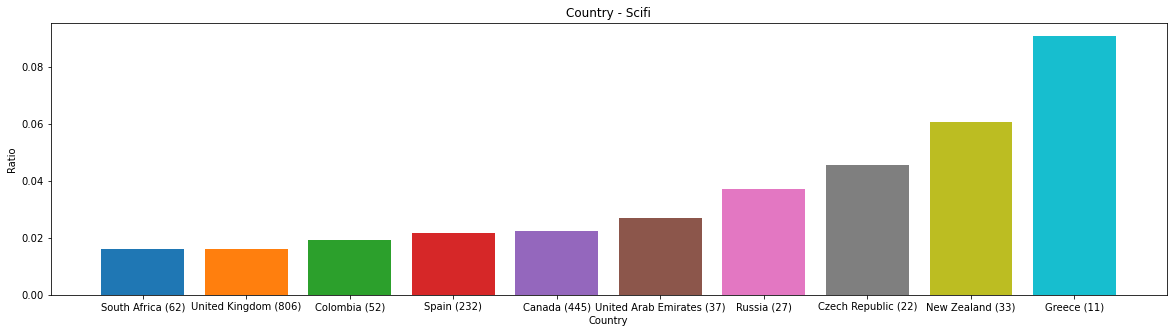

In [ ]:
result = count_category(df, df_scifi, category="country")

bar_graph(result, "Country", title="Country - Scifi")

그리스에서는 다른 컨텐츠와 비교하여 우주를 주제로하는 콘텐츠가 많이 제작되었습니다. 비율의 수치는 약 0.1로 작은 수치이지만 다른 국가와 비교하면 상대적으로 큰 수치입니다.

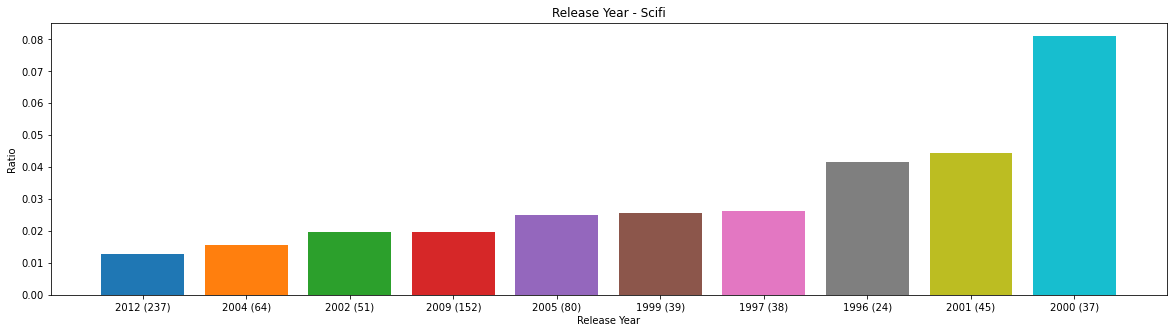

In [ ]:
result = count_category(df, df_scifi, category="release_year")

bar_graph(result, "Release Year", title="Release Year - Scifi")

2000년도에 다른 컨텐츠와 비교하여 우주를 주제로하는 콘텐츠가 많이 제작되었습니다. 비율의 수치는 약 0.1로 작은 수치이지만 다른 시기와 비교하면 상대적으로 큰 수치입니다.

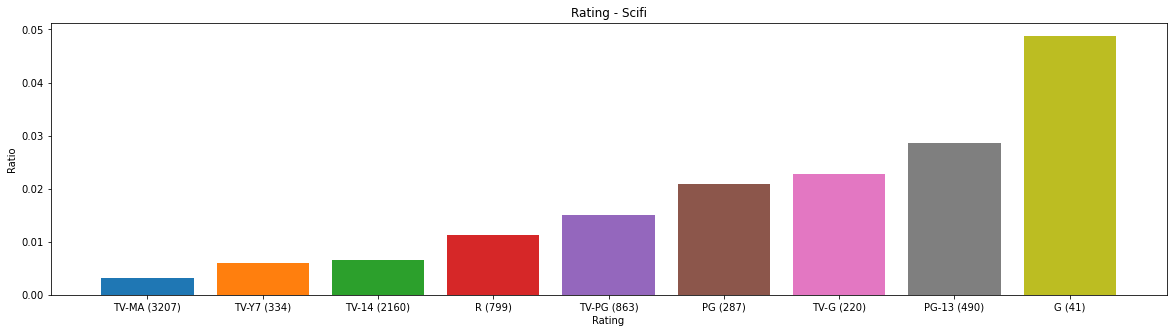

In [ ]:
result = count_category(df, df_scifi, category="rating")

bar_graph(result, "Rating", title="Rating - Scifi")

우주를 주제로 하는 컨텐츠들은 "R" 등급의 영화보다 상대적으로 낮은 13세 이하의 관람등급이 많이 존재합니다.

#### 인공지능 테마

인공지능이 등장하는 컨텐츠가 어떤 국가에서 많이 제작되는지, 어느 시기에 많이 개봉되었는지, 어느 감독이 많이 제작하였는지, 어떤 관람등급이 많은지를 확인합니다.  
컨텐츠에 인공지능이 등장하는지는 특정 키워드들(`robot, artificial intelligence, code, program`)을 포함하고 있는지, 특정 장르(`sci-fi`)를 포함하고 있는지를 보고 확인합니다.

In [ ]:
df_ai = df[df["listed_in"].str.lower().str.contains("sci".lower())]
df_ai["title_desc"] = df_ai["title"] + " " + df_ai["description"]
df_ai = df_ai[
    df_ai["title_desc"]
    .str.lower()
    .str.contains("robot|aritificial|intelligence|code|program".lower())
]
df_ai.head()

index show_id     type                 title  \
133     133    s134    Movie               Chappie   
332     332    s333    Movie         Deep Blue Sea   
486     486    s487    Movie     Ratchet and Clank   
883     883    s884  TV Show  Love, Death & Robots   
1957   1957   s1958    Movie            Real Steel   

                           director  \
133                  Neill Blomkamp   
332                    Renny Harlin   
486   Jericca Cleland, Kevin Munroe   
883                             NaN   
1957                     Shawn Levy   

                                                   cast  \
133   Sharlto Copley, Hugh Jackman, Sigourney Weaver...   
332   Thomas Jane, Saffron Burrows, Samuel L. Jackso...   
486   Paul Giamatti, John Goodman, Bella Thorne, Ros...   
883   Topher Grace, Mary Elizabeth Winstead, Gary Co...   
1957  Hugh Jackman, Dakota Goyo, Evangeline Lilly, A...   

                               country          date_added  release_year  \
133        South Africa, United States   September 1, 2021          2015   
332              United States, Mexico      August 1, 2021          1999   
486   Hong Kong, Canada, United States        July 9, 2021          2016   
883                      United States        May 14, 2021          2021   
1957              United States, India  September 24, 2020          2011   

     rating   duration                                          listed_in  \
133       R    121 min               Action & Adventure, Sci-Fi & Fantasy   
332       R    105 min  Action & Adventure, Horror Movies, Sci-Fi & Fa...   
486      PG     94 min  Children & Family Movies, Comedies, Sci-Fi & F...   
883   TV-MA  2 Seasons  TV Action & Adventure, TV Horror, TV Sci-Fi & ...   
1957  PG-13    127 min  Action & Adventure, Sci-Fi & Fantasy, Sports M...   

                                            description  \
133   In a futuristic society where an indestructibl...   
332   Scientists conduct research on sharks in searc...   
486   Affable alien Ratchet longs to be a Galactic R...   
883   Terrifying creatures, wicked surprises and dar...   
1957  A struggling fighter-turned-promoter reconnect...   

                                             title_desc  
133   Chappie In a futuristic society where an indes...  
332   Deep Blue Sea Scientists conduct research on s...  
486   Ratchet and Clank Affable alien Ratchet longs ...  
883   Love, Death & Robots Terrifying creatures, wic...  
1957  Real Steel A struggling fighter-turned-promote...

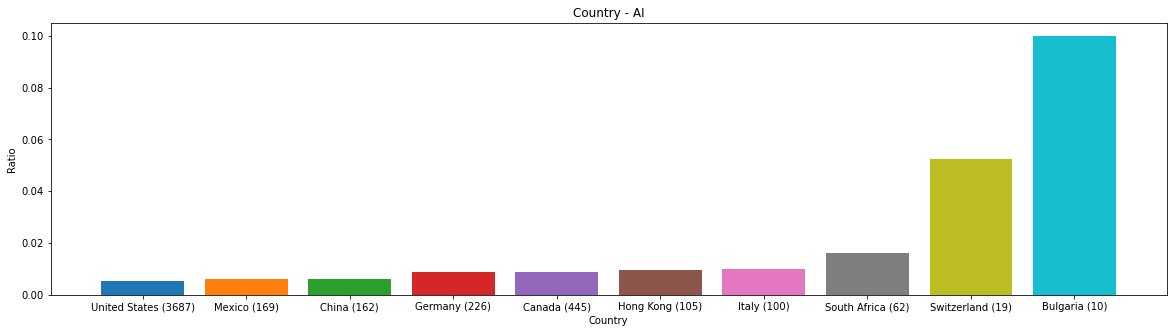

In [ ]:
result = count_category(df, df_ai, category="country")

bar_graph(result, "Country", title="Country - AI")

인공지능, 로봇이 등장하는 컨텐츠는 불가리아에서 높은 비율로 제작되었습니다.

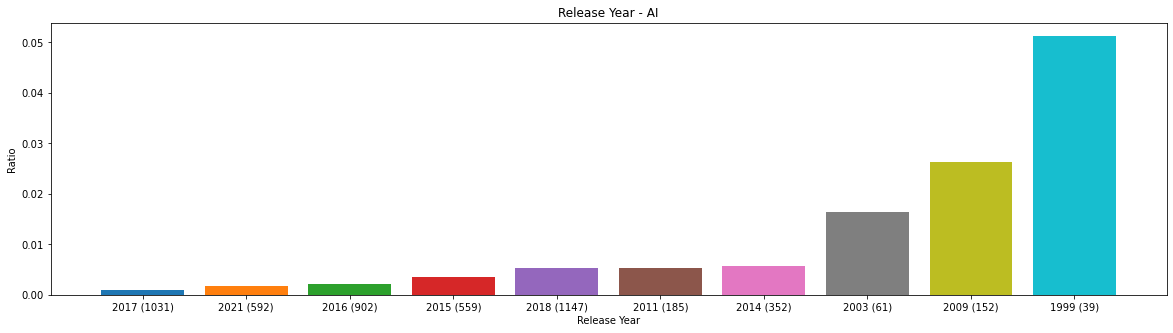

In [ ]:
result = count_category(df, df_ai, category="release_year")

bar_graph(result, "Release Year", title="Release Year - AI")

2003년, 2009년, 1999년에는 다른 시기와 비교하여 인공지능 주제의 컨텐츠가 많이 제작되었습니다.

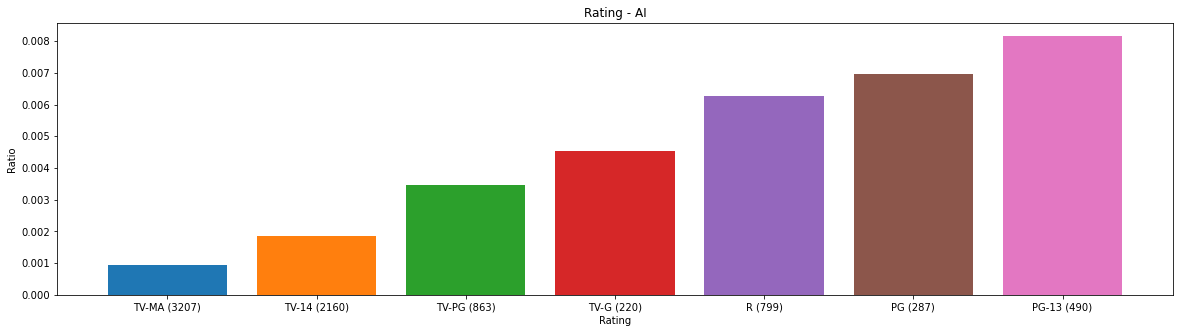

In [ ]:
result = count_category(df, df_ai, category="rating")

bar_graph(result, "Rating", title="Rating - AI")

인공지능을 주제로하는 컨텐츠는 우주 주제 컨텐츠와 비교하여 "R" 등급의 영화일 확률이 높습니다.

### 추천에 사용할 속성 결정

- 각 속성들에 대한 통계를 확인하여, 어떤 특징을 보이는지 확인하였습니다. 이에 따라 어떤 속성을 사용할 것인지 결정합니다.
    1. show_id 는 단순히 데이터의 인덱스를 나타내는 데이터로 컨텐츠 추천에 도움이 되지 않는 정보입니다.
    2. type은 컨텐츠의 종류를 나타내는 데이터로, 도움이 되는 정보입니다.
    3. title 은 컨텐츠의 제목을 표현하지만, 제목은 비유나 상징이 포함되어 있어 컨텐츠의 속성을 제대로 표현할 수 없는 경우가 많아 도움이 되지 않는 정보입니다.
    4. director는 감독 정보로, 도움이 되는 정보입니다.
    5. cast 는 출연진 정보로, 도움이 되는 정보입니다.
    6. country 는 국가 정보로, 도움이 되는 정보입니다.
        - 특정 국가는 특정 장르를 많이 제작합니다.
    7. date_added 는 넷플릭스에 컨텐츠가 추가된 날짜로 중요하지 않은 정보입니다.
    8. year 는 콘텐츠가 공개된 날짜로, 도움이 되지 않는 정보입니다.
    9. rating 은 관람연령에 관련 정보로, 도움이 되는 정보입니다.
        - 특정 장르 또는 특정 주제를 다루는 영화들이 많이 받은 관람 등급이 존재합니다.
    10. duration 은 영상 길이에 대한 정보로, 도움이 되지 않는 정보입니다.
    11. listed_in 은 장르와 같은 정보로, 도움이 되는 정보입니다.
        - 특정 장르는 특정 국가에서 많이 제작됩니다.
    12. description 은 컨텐츠 줄거리에 대한 정보로, 도움이 되는 정보입니다.

| 속성 | 사용여부 |
| --- | :-: |
| show_id |-|
| type |✓|
| title |-|
| director |✓|
| cast |✓|
| country |✓|
| date_added |-|
| year |-|
| rating |✓|
| duration |-|
| listed_in |✓|
| description |✓|

## 데이터 전처리

사용하려고 하는 속성 중 `description` 은 문자열로 전처리가 필요합니다.

In [ ]:
desc = df["description"]
desc.head()

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

### 문자열 전처리

1. 소문자 변환
2. 문장부호 제거
3. " 그리고 - 제거
4. 소유격 표현 제거
5. 2개 이상의 공백 제거
6. 불용어 제거

In [ ]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download("stopwords")


def preprocess_sent(desc):
    desc = desc.lower()
    desc = re.sub(r"[,.?!]", " ", desc)
    desc = re.sub(r'["-]', "", desc)
    desc = re.sub(r"'s\b", "", desc)
    desc = re.sub(r'[" "]+', " ", desc)
    desc = remove_stop(desc)
    return desc


def remove_stop(sent):
    sent = sent.split()
    stop = set(stopwords.words("english"))
    sent = [x for x in sent if not x in stop]
    sent = " ".join(sent)
    return sent

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jhoon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


문자열 전처리를 위해 작성한 함수를 적용합니다.

In [ ]:
desc_processed = desc.apply(preprocess_sent)
desc_processed.head()

0    father nears end life filmmaker kirsten johnso...
1    crossing paths party cape town teen sets prove...
2    protect family powerful drug lord skilled thie...
3    feuds flirtations toilet talk go among incarce...
4    city coaching centers known train india’s fine...
Name: description, dtype: object

벡터들 간의 Cosine 유사도를 통해 `description` 간의 유사도를 측정하고자, 문자열을 벡터로 변환합니다.  
벡터 변환에는 구글 뉴스 데이터셋에 포함되어 있는 약 1,000억 개의 단어들로 [사전 훈련된 모델](https://code.google.com/archive/p/word2vec/)을 사용합니다.  

In [ ]:
from gensim.models import Word2Vec

desc_new = []
for w in desc_processed:
    desc_new.append(w.split())

model = Word2Vec(vector_size=300, min_count=2, workers=4)
model.build_vocab(desc_new)
model.wv.vectors_lockf = np.ones(len(model.wv), dtype=np.float32)
model.wv.intersect_word2vec_format(
    "GoogleNews-vectors-negative300.bin", lockf=1.0, binary=True
)
model.train(desc_new, total_examples=model.corpus_count, epochs=7)

(804242, 894537)

학습이 완료된 모델을 테스트합니다.

In [ ]:
model.wv.most_similar("soldier")

[('soldiers', 0.7976657748222351),
 ('military', 0.7218513488769531),
 ('policeman', 0.7060171365737915),
 ('1899', 0.7009996175765991),
 ('army', 0.6965514421463013),
 ('17yearold', 0.6789675951004028),
 ('1946', 0.6733789443969727),
 ('women’s', 0.6708964705467224),
 ('tessa', 0.6707472205162048),
 ('prisoner', 0.6697519421577454)]

"soldier" 라는 단어에 대해서 "military", "army"와 같이 의미 연관도가 높은 단어들을 예측하였습니다.

In [ ]:
model.wv.most_similar("love")

[('romance', 0.7362460494041443),
 ('carlana', 0.7317412495613098),
 ('friendship', 0.7076244354248047),
 ('passion', 0.7059850096702576),
 ('loves', 0.7034774422645569),
 ('romantic', 0.7031666040420532),
 ('javanese', 0.675778329372406),
 ('passionate', 0.673871636390686),
 ('feelings', 0.6707541346549988),
 ('25yearold', 0.6600914001464844)]

"love" 라는 단어에 대해서 "romance", "passion"과 같이 연관도가 높은 단어들을 결과로 얻었습니다.

문장들을 벡터화 하는 함수를 정의합니다.

In [ ]:
def vectorize(sentences):
    embeddings = []
    for sent in sentences:
        w2v = None
        count = 0
        for word in sent:
            if word in model.wv.key_to_index:
                count += 1
                if w2v is None:
                    w2v = model.wv[word]
                else:
                    w2v = w2v + model.wv[word]
        if w2v is not None:
            w2v = w2v / count
            embeddings.append(w2v)
    return embeddings

## 유사 컨텐츠 추천

사용하려는 속성을 추천에 어떻게 반영할지 결정되었습니다. 이제 각 속성들을 사용하여 유사도를 측정하고, 입력받은 컨텐츠와 유사한 컨텐츠를 추천합니다.  
유사도 측정은 다음과 같은 순서로 진행됩니다.
1. 벡터화된 `description`의 Cosine 유사도 측정
2. `type`, `rating`을 비롯한 총 6개의 속성들을 사용하여 속성 기반 가중치 획득
3. 1번에서 얻은 유사도와 2번에서 얻은 가중치를 곱하여 최종 유사도 결정

### 속성 기반 가중치

`description` 항목에 대한 준비는 완료되었고, 사용하려는 나머지 항목들을 어떻게 사용할 것인지 함수로 정의합니다.
1. `rating` 항목은 기준이 되는 영화와 관람 연령 차이가 많이 나면, 연관도가 낮은 것으로 간주합니다.
2. `type` 항목은 기준이 되는 영화와 동일하면, 연관도가 높은 것으로 간주합니다.
3. `director`, `cast`, `country`, `listed_in` 항목들은 기준이 되는 영화와 일치하는 항목이 많을수록, 연관도가 높은 것으로 간주합니다.
4. 기준이 되는 영화 또는 비교하려는 영화의 속성 중 `nan` 가 존재한다면 해당 항목은 가중치 계산에 반영하지 않습니다.
5. 각 값들의 크기는 1을 넘지 않습니다.

총 6가지 항목에 대한 결과들의 평균을 Cosine 유사도에 대한 가중치로 사용합니다.

In [ ]:
rating_to_age = {
    "G": 0,
    "TV-G": 0,
    "TV-Y": 0,
    "PG": 7,
    "TV-Y7": 7,
    "TV-Y7-FV": 7,
    "TV-PG": 7,
    "PG-13": 13,
    "TV-14": 16,
    "TV-MA": 18,
    "NC-17": 18,
    "R": 18,
    "NR": 18,
    "UR": 18,
}


def compare_type(src, tar):
    return int(src == tar)


def compare_rating(src, tar):
    if pd.isna(src) or pd.isna(tar):
        return "err"
    return -1 * abs(rating_to_age[src] - rating_to_age[tar]) / 18


def compare_attr(src, tar):
    if pd.isna(src) or pd.isna(tar):
        return "err"
    if "," in src:
        src = src.split(",")
        src = [x.strip() for x in src]
    else:
        src = [src]
    if "," in tar:
        tar = tar.split(",")
        tar = [x.strip() for x in tar]
    else:
        tar = [tar]
    return len(set(src).intersection(set(tar))) / len(set(tar))


def get_weight(src, tar):
    lst = []
    lst.append(compare_type(src["type"], tar["type"]))
    lst.append(compare_rating(src["rating"], tar["rating"]))
    lst.append(compare_attr(src["director"], tar["director"]))
    lst.append(compare_attr(src["cast"], tar["cast"]))
    lst.append(compare_attr(src["country"], tar["country"]))
    lst.append(compare_attr(src["listed_in"], tar["listed_in"]))
    lst = [x for x in lst if x != "err"]
    return sum(lst) / len(lst)

### Cosine 유사도 측정

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


embeddings = vectorize(desc_new)


def find_similar(title, use_weight=True, use_cosine=True):
    if not use_weight and not use_cosine:
        print("Invalid options")
        return
    cosine_similarities = cosine_similarity(embeddings)
    idx_src = df[df["title"] == title].index
    cosine_sim = list(enumerate(cosine_similarities[idx_src][0]))
    sim_sorted = sorted(cosine_sim, key=lambda x: x[1], reverse=True)
    indices_top = [x[0] for x in sim_sorted[1:]]
    res = {}
    for idx_tar in indices_top:
        src = df.iloc[idx_src].squeeze()
        tar = df.iloc[idx_tar]
        weight = get_weight(src, tar) if use_weight else 1
        res[tar.title] = weight * cosine_sim[idx_tar][1] if use_cosine else weight
    res = sorted(res.items(), key=lambda x: x[1], reverse=True)
    return res

### "레이더스"와 비슷한 영화 찾기

스티븐 스필버그의 영화 "레이더스(인디아나 존스의 첫번째 영화)"가 데이터에 존재하는지 확인합니다.

In [ ]:
df[df["title"].str.lower().str.contains("jones")].head(10)

index show_id     type  \
168     168    s169    Movie   
472     472    s473  TV Show   
798     798    s799    Movie   
1909   1909   s1910    Movie   
3027   3027   s3028    Movie   
3752   3752   s3753  TV Show   
6493   6496   s6497    Movie   
7067   7070   s7071    Movie   
7068   7071   s7072    Movie   
7069   7072   s7073    Movie   

                                                  title  \
168                                       Osmosis Jones   
472                                        Ridley Jones   
798                                          Love Jones   
1909                                Free State of Jones   
3027                         Leslie Jones: Time Machine   
3752                             Marvel's Jessica Jones   
6493                                    Cleopatra Jones   
7067  Indiana Jones and the Kingdom of the Crystal S...   
7068                 Indiana Jones and the Last Crusade   
7069      Indiana Jones and the Raiders of the Lost Ark   

                            director  \
168   Bobby Farrelly, Peter Farrelly   
472                              NaN   
798                 Theodore Witcher   
1909                       Gary Ross   
3027       David Benioff, D.B. Weiss   
3752                             NaN   
6493                   Jack Starrett   
7067                Steven Spielberg   
7068                Steven Spielberg   
7069                Steven Spielberg   

                                                   cast        country  \
168   Chris Rock, Laurence Fishburne, David Hyde Pie...  United States   
472   Iara Nemirovsky, Laraine Newman, David Errigo ...  United States   
798   Larenz Tate, Nia Long, Isaiah Washington, Lisa...  United States   
1909  Matthew McConaughey, Gugu Mbatha-Raw, Mahersha...  United States   
3027                                       Leslie Jones  United States   
3752  Krysten Ritter, David Tennant, Rachael Taylor,...  United States   
6493  Tamara Dobson, Bernie Casey, BrendaSykes, Esth...  United States   
7067  Harrison Ford, Cate Blanchett, Karen Allen, Ra...  United States   
7068  Harrison Ford, Sean Connery, Denholm Elliott, ...  United States   
7069  Harrison Ford, Karen Allen, Paul Freeman, Rona...  United States   

             date_added  release_year rating   duration  \
168   September 1, 2021          2001     PG     95 min   
472       July 13, 2021          2021   TV-Y   1 Season   
798        June 2, 2021          1997      R    109 min   
1909    October 1, 2020          2016      R    139 min   
3027   January 14, 2020          2020  TV-MA     66 min   
3752      June 14, 2019          2019  TV-MA  3 Seasons   
6493   November 1, 2019          1973     PG     89 min   
7067    January 1, 2019          2008  PG-13    123 min   
7068    January 1, 2019          1989  PG-13    127 min   
7069    January 1, 2019          1981     PG    116 min   

                                              listed_in  \
168   Action & Adventure, Children & Family Movies, ...   
472                                            Kids' TV   
798                Comedies, Dramas, Independent Movies   
1909                         Action & Adventure, Dramas   
3027                                    Stand-Up Comedy   
3752   Crime TV Shows, TV Action & Adventure, TV Dramas   
6493                 Action & Adventure, Classic Movies   
7067  Action & Adventure, Children & Family Movies, ...   
7068  Action & Adventure, Children & Family Movies, ...   
7069  Action & Adventure, Children & Family Movies, ...   

                                            description  
168   Peter and Bobby Farrelly outdo themselves with...  
472   Curious kid Ridley and her friends protect the...  
798   A poet and a photographer take a chance on rom...  
1909  A Mississippi farmer turns outlaw as he leads ...  
3027  From trying to seduce Prince to battling sleep...  
3752  Haunted by a traumatic past, Jessica Jones use...  
6493  A stylin' special agent chases down

추천하는 컨텐츠의 포스터를 확인할 수 있도록 포스터 출력 함수를 정의합니다. 포스터 데이터는 [Cinemagoer](https://github.com/cinemagoer/cinemagoer) 라이브러리를 통해 "[IMDb](https://www.imdb.com/)" 사이트에서 획득합니다.

In [ ]:
from imdb import Cinemagoer
import requests
from io import BytesIO
from PIL import Image


ia = Cinemagoer()


def get_poster(title):
    movies = ia.search_movie(title)
    cover_url = movies[0].data["cover url"]
    # https://github.com/cinemagoer/cinemagoer/issues/146#issuecomment-380590663
    if "@" in cover_url:
        cover_url = (
            cover_url[: cover_url.rindex("@") + 1] + cover_url[cover_url.rindex(".") :]
        )
    result = requests.get(cover_url)
    return Image.open(BytesIO(result.content))


def display_recomm(lst, target, num=10, limit=30):
    plt.figure(figsize=(25, 20))
    cols = 5
    for idx, (title, score) in enumerate(lst):
        plt.subplot(num // cols + 1, cols, idx + 1)
        plt.axis("off")
        if len(title) > limit:
            title = title[:limit] + "..."
        plt.title(f"{title} ({score:.3f})")
        plt.imshow(get_poster(title))
    plt.suptitle(f"You've watched {target}...", fontsize=28)

첫번째 인디아나 존스 영화 "레이더스(Indiana Jones and the Raiders of the Lost Ark)"를 기준으로 컨텐츠 추천을 진행합니다.

In [ ]:
target = "Indiana Jones and the Raiders of the Lost Ark"

`description` 데이터에 대하여 Cosine 유사도를 적용하여 유사한 영화를 추천합니다.

In [ ]:
result = find_similar(target, use_weight=False)[:10]
result

[('Pukar', 0.8974153995513916),
 ("Digs & Discoveries: All Track's Lead to Rome", 0.8938489556312561),
 ('Aiyaary', 0.89293372631073),
 ('Traitors', 0.8909217715263367),
 ('Wu Assassins', 0.8902963995933533),
 ('Who Killed Malcolm X?', 0.889256477355957),
 ('Inglourious Basterds', 0.8876090049743652),
 ('Django Unchained', 0.8868123292922974),
 ('China Salesman', 0.8865963220596313),
 ('The Vault', 0.88611900806427)]

영화 "레이더스"에 대해 추천된 항목들 중에는 다소 연관성이 떨어진다고 판단되는 항목들이 존재합니다. "Digs & Discoveries: All Track's Lead to Rome"의 경우, 기차 토마스가 등장하는 아동용 애니메이션이며, "Pukar"의 경우 인도의 액션 스릴러 영화입니다. 상위 항목들로 미루어 보아 `description` 만을 사용한 추천에는 한계가 존재한다고 생각할 수 있습니다.

이번에는 Cosine 유사도를 사용하지 않고, 앞서 정의한 속성 기반 가중치를 사용하여 영화를 추천합니다.

In [ ]:
result = find_similar(target, use_cosine=False)[:10]
result

[('Indiana Jones and the Temple of Doom', 0.6833333333333332),
 ('Indiana Jones and the Last Crusade', 0.6611111111111111),
 ('LEGO Marvel Super Heroes: Guardians of the Galaxy', 0.6527777777777778),
 ('Jaws', 0.611111111111111),
 ('Power Rangers: Megaforce: Raising Spirits', 0.6),
 ('Power Rangers Samurai: Clash of the Red Rangers', 0.6),
 ('Spirit Riding Free: Spirit of Christmas', 0.6),
 ('Monster High: Haunted', 0.6),
 ('Indiana Jones and the Kingdom of the Crystal Skull', 0.5972222222222222),
 ('The Adventures of Tintin', 0.5555555555555556)]

속성 기반 가중치를 사용하면, 동일한 주인공이 등장하는 시리즈인 "인디아나 존스" 영화들이 등장합니다. "Indiana Jones and the Kingdom of the Crystal Skull" 항목이 다른 영화와 비교하여 순위가 낮은 것은 한계점으로 보입니다. 한편 비슷한 모험을 주제로하는 "The Adventures of Tintin"과 같은 영화도 추천됩니다. Cosine 유사도만을 사용한 결과와 비교하여 더 나은 결과로 보입니다.

이번에는 Cosine 유사도에 속성 기반 가중치를 적용하여 영화를 추천합니다.

In [ ]:
result = find_similar(target)[:10]
result

[('Indiana Jones and the Last Crusade', 0.5681656496392355),
 ('Indiana Jones and the Temple of Doom', 0.5650415758291879),
 ('LEGO Marvel Super Heroes: Guardians of the Galaxy', 0.53286003238625),
 ('Indiana Jones and the Kingdom of the Crystal Skull', 0.5223713103267882),
 ('Jaws', 0.5110082692570156),
 ('Power Rangers: Megaforce: Raising Spirits', 0.4654746294021606),
 ('The Adventures of Tintin', 0.4577718178431193),
 ('Power Rangers Samurai: Clash of the Red Rangers', 0.4515536069869995),
 ('LEGO Ninjago: Masters of Spinjitzu: Day of the Departed',
  0.43644917011260986),
 ('LEGO: Marvel Super Heroes: Maximum Overload', 0.4280925393104553)]

낮은 순위에 존재하던 "Indiana Jones and the Kingdom of the Crystal Skull" 영화의 우선순위가 높아졌고, 대부분의 영화가 영웅이나 모험을 주제로 하는 내용입니다. 예측의 결과가 향상되었다고 판단됩니다.

추천된 영화의 직관적인 확인을 위해 영화 포스터를 확인합니다.

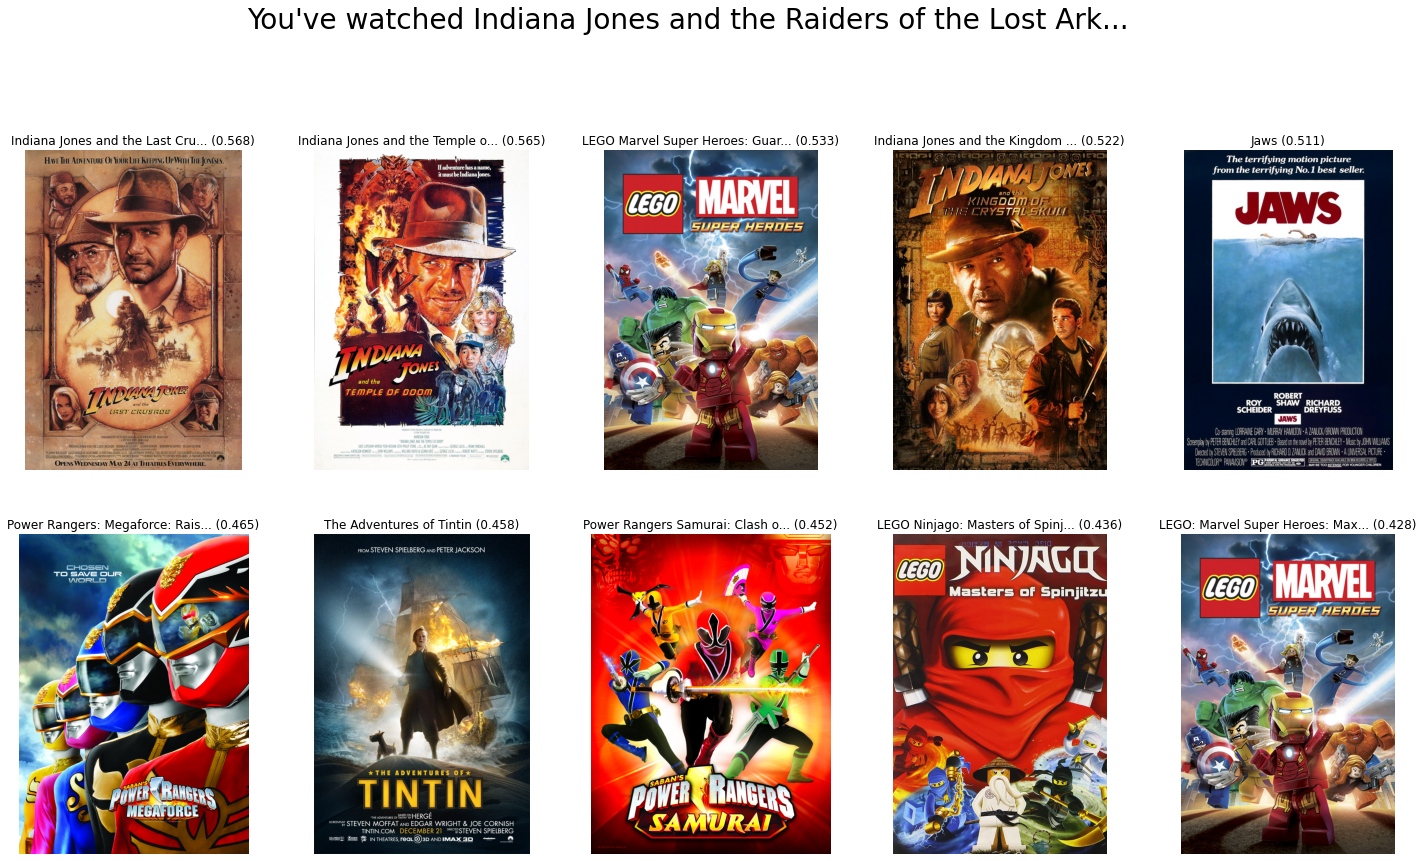

In [ ]:
display_recomm(result, target)

### "007" 시리즈와 비슷한 영화 찾기

이번에는 한 편의 영화가 아니라 영화 시리즈에 대해 유사한 영화들을 추천합니다. "007" 시리즈에 대한 정보를 검색합니다.

In [ ]:
df[df["description"].str.lower().str.contains("007|james bond")].head(10)

index show_id   type                    title            director  \
6424   6427   s6428  Movie            Casino Royale     Martin Campbell   
6606   6609   s6610  Movie          Die Another Day        Lee Tamahori   
6863   6866   s6867  Movie                GoldenEye     Martin Campbell   
7806   7809   s7810  Movie        Quantum of Solace        Marc Forster   
8561   8564   s8565  Movie  The World Is Not Enough       Michael Apted   
8600   8603   s8604  Movie      Tomorrow Never Dies  Roger Spottiswoode   

                                                   cast  \
6424  Daniel Craig, Judi Dench, Eva Green, Jeffrey W...   
6606  Pierce Brosnan, Halle Berry, Toby Stephens, Ri...   
6863  Pierce Brosnan, Sean Bean, Izabella Scorupco, ...   
7806  Daniel Craig, Olga Kurylenko, Mathieu Amalric,...   
8561  Pierce Brosnan, Sophie Marceau, Robert Carlyle...   
8600  Pierce Brosnan, Jonathan Pryce, Michelle Yeoh,...   

                                                country         date_added  \
6424  United Kingdom, Czech Republic, United States,...    August 31, 2020   
6606                      United Kingdom, United States  December 31, 2019   
6863                      United Kingdom, United States  December 31, 2019   
7806                      United Kingdom, United States    August 31, 2020   
8561                      United Kingdom, United States  December 31, 2019   
8600                      United Kingdom, United States  December 31, 2019   

      release_year rating duration           listed_in  \
6424          2006  PG-13  145 min  Action & Adventure   
6606          2002  PG-13  133 min  Action & Adventure   
6863          1995  PG-13  130 min  Action & Adventure   
7806          2008  PG-13  106 min  Action & Adventure   
8561          1999  PG-13  128 min  Action & Adventure   
8600          1997  PG-13  119 min  Action & Adventure   

                                            description  
6424  Daniel Craig makes his debut as the newly mint...  
6606  Pierce Brosnan's final outing as 007 finds Jam...  
6863  Pierce Brosnan takes his first turn as debonai...  
7806  Picking up an hour after the events of 2006's ...  
8561  Greed, revenge, world domination: It's all in ...  
8600  Pierce Brosnan stars in this 007 installment, ...

총 6편의 시리즈가 존재합니다. 해당 시리즈들과 유사한 영화들을 추천합니다.

In [ ]:
def append_my(lst1, lst2):
    for k, v in lst2:
        if not k in lst1.keys():
            lst1[k] = v
        elif lst1[k] < v:
            lst1[k] = v


result = {}
df_zerozero = df[df["description"].str.lower().str.contains("007|james bond")]
for title in df_zerozero["title"]:
    res = find_similar(title)[:20]
    res = [x for x in res if not x[0] in list(df_zerozero["title"])]
    append_my(result, res)
result = sorted(list(result.items()), key=lambda x: x[1], reverse=True)
result

[('XXX: State of the Union', 0.5350717703501383),
 ('Green Lantern', 0.5119260400533676),
 ('Next', 0.5012548665205638),
 ('Polar', 0.46493490537007653),
 ('American Outlaws', 0.44514864683151245),
 ('S.W.A.T.', 0.4410632848739624),
 ('The River Wild', 0.43998414278030396),
 ('The Darkest Dawn', 0.43976269579595995),
 ('Takers', 0.4366113543510437),
 ('Vantage Point', 0.43567949533462524),
 ('Tracers', 0.4322400689125061),
 ('16 Blocks', 0.4277341961860657),
 ('The Hurricane Heist', 0.4244339168071747),
 ("Dante's Peak", 0.4181825896104177),
 ('Olympus Has Fallen', 0.41786830623944604),
 ('The November Man', 0.41459430809374204),
 ('The Mask of Zorro', 0.41356482770707875),
 ('Patriot Games', 0.41260158895242094),
 ('The Foreigner', 0.409940838340729),
 ('Rogue Warfare: Death of a Nation', 0.40964479247728985),
 ('Passenger 57', 0.4095585798775708),
 ('The Hard Way', 0.4092766852290542),
 ('The Saint', 0.4088819573322932),
 ('Angel Has Fallen', 0.40805048136799427),
 ('Stranger than Fi

추천 결과 "XXX", "Polar", "Vantage Point"와 같이 요원이 등장하는 액션 영화들이 많이 추천되었습니다.

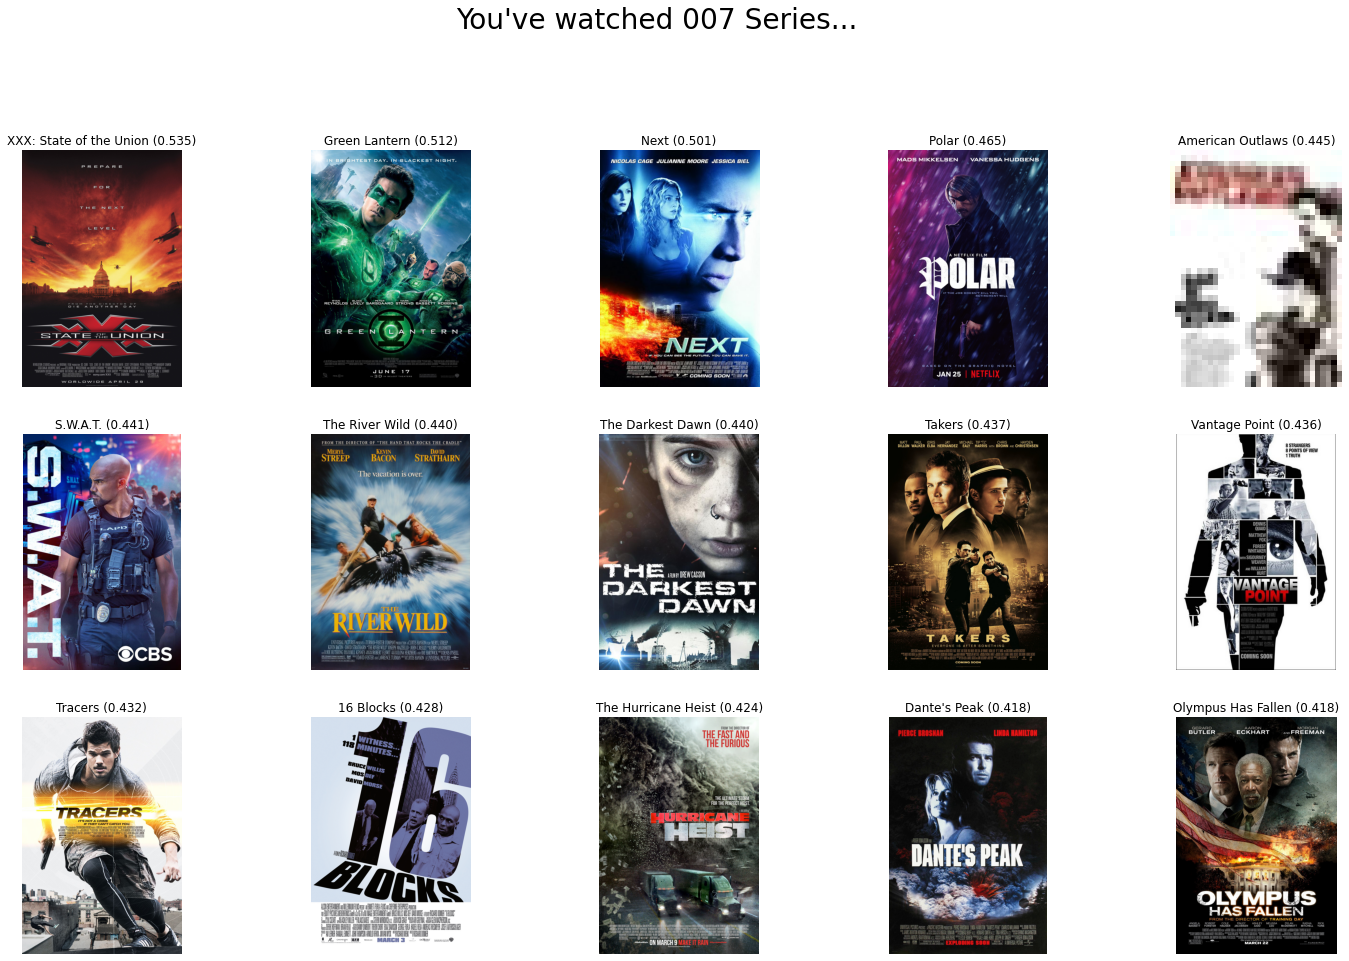

In [ ]:
display_recomm(result[:15], target="007 Series", num=15)